Summary of key observations:

	1.	School Distribution vs. Enrollment Size:
Boroughs like the Bronx and Manhattan have more schools but serve fewer students than Queens and Staten Island, suggesting that schools in Queens and Staten Island are larger on average.


	2.	Access to Advanced Programs Varies:
Access to Advanced Placement, online AP, and language classes is not evenly distributed across boroughs. Some boroughs have significantly more schools offering these programs, reflecting potential disparities in academic opportunities.


	3.	Gender Equity in PSAL Sports:
There is no significant gender imbalance in PSAL sports offerings. Boys’, girls’, and combined sports are offered at similar rates, indicating equitable access to athletic programs across schools.

In [42]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Saving high-school-directory.csv to high-school-directory (1).csv


In [44]:
# cleaning the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [45]:
# counting total schools in Brooklyn
brooklyn_count = df[df['borough'] == 'Brooklyn']['dbn'].count()
print(f'Total schools in Brooklyn: {brooklyn_count}')

# how many offer grade 9 entry
brooklyn_grade9 = df[(df['borough'] == 'Brooklyn') & (df['grade_span_min'] == 9)]['dbn'].count()
print(f'Brooklyn schools offering grade 9 entry: {brooklyn_grade9}')

Total schools in Brooklyn: 121
Brooklyn schools offering grade 9 entry: 98


borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: count, dtype: int64


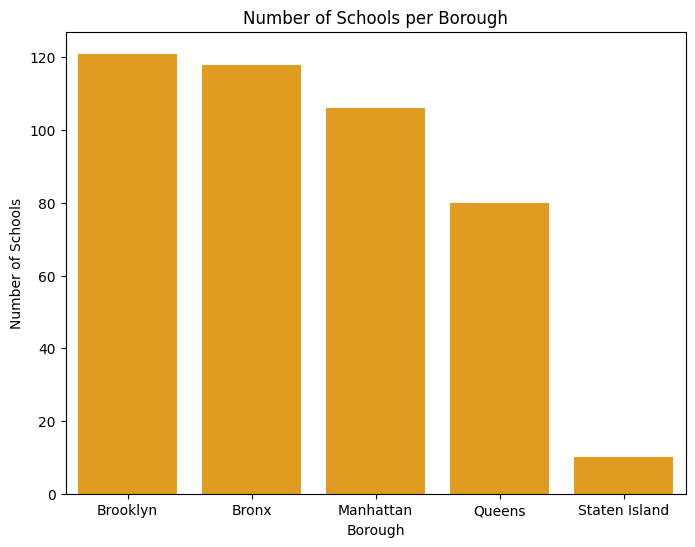

In [46]:
# count the number of schools per borough
school_counts = df['borough'].value_counts()
print(school_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=school_counts.index, y=school_counts.values, color= 'orange')
plt.title('Number of Schools per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.show()

In [47]:
# avg number of studants per school per borough
avg_students = df.groupby('borough')['total_students'].mean()
print(avg_students)

borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64


In [48]:
# Summary of grade_span_max grouped by borough
grade_summary = df.groupby('borough')['grade_span_max'].describe()
print(grade_summary)

               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


In [49]:
# total students per borough
total_students = df.groupby('borough')['total_students'].sum()
print(total_students)

borough
Bronx            57868.0
Brooklyn         83197.0
Manhattan        60752.0
Queens           79545.0
Staten Island    18475.0
Name: total_students, dtype: float64


/tmp/ipython-input-3090417853.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i], y[i], borough, fontsize=9)


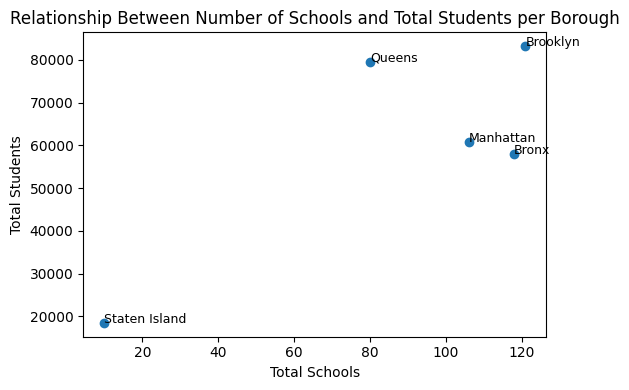

In [50]:
# Corelation total students X total schools

boroughs = total_students.index
x = school_counts[boroughs]
y = total_students[boroughs]


plt.figure(figsize=(6, 4))
plt.scatter(x, y)


for i, borough in enumerate(boroughs):
    plt.text(x[i], y[i], borough, fontsize=9)

plt.title('Relationship Between Number of Schools and Total Students per Borough')
plt.xlabel('Total Schools')
plt.ylabel('Total Students')
plt.tight_layout()
plt.show()

Bronx and Manhattan have more schools than Queens, yet they serve fewer students overall. This suggests that schools in Queens tend to have larger student populations, while Bronx and Manhattan have a greater number of smaller schools on average. It may reflect differences in school size population density, or resource distribution across boroughs.

Raw counts of schools offering each program:
               advancedplacement_courses  online_ap_courses  language_classes
borough                                                                      
Bronx                                 87                 10               107
Brooklyn                              93                 25               118
Manhattan                             85                 13               101
Queens                                65                 15                76
Staten Island                         10                  1                10

 Percent of schools in each borough offering each program:
               advancedplacement_courses  online_ap_courses  language_classes
borough                                                                      
Bronx                               73.7                8.5              90.7
Brooklyn                            76.9               20.7              97.5
Manhattan                           8

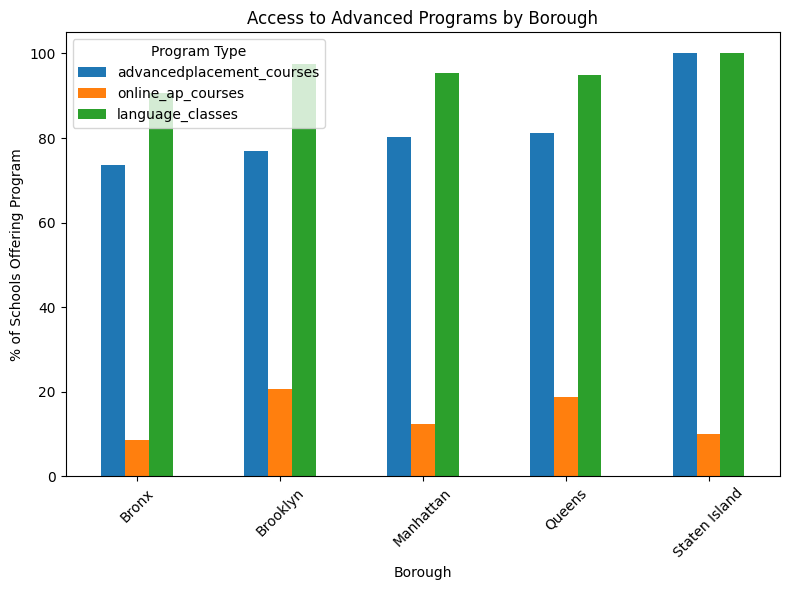

In [51]:
# Comparing how many schools offer AP courses, online AP and language classes
# per borough

# Defining couts of schools that offer each program
program_cols = ['advancedplacement_courses', 'online_ap_courses', 'language_classes']
access_counts = df.groupby('borough')[program_cols].apply(lambda x: x.notnull().sum())

# % of schools in each borough offering each program
school_counts = df['borough'].value_counts()
access_percent = access_counts.divide(school_counts, axis=0) * 100

print("Raw counts of schools offering each program:")
print(access_counts)

print("\n Percent of schools in each borough offering each program:")
print(access_percent.round(1))

access_percent.plot(kind='bar', figsize=(8, 6))
plt.title('Access to Advanced Programs by Borough')
plt.ylabel('% of Schools Offering Program')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.legend(title='Program Type')
plt.tight_layout()
plt.show()

Schools in Queens and Staten Island are more likly to offer Advanced Placement and Language Classes compare to Bronx. This highlights a potentioal disparity in access to advanced academic courses across boroughs. Possible influence: funding, school sizes, resources priorities.

In [52]:
# Are there gender imbalancies in offerings of Sport classes?

psal_counts = {
    'Boys Sports' : df['psal_sports_boys'].notnull().sum(),
    'Girls Sports' : df['psal_sports_girls'].notnull().sum(),
    'Combined Sports' : df['psal_sports_coed'].notnull().sum()
}

psal_df = pd.DataFrame.from_dict(psal_counts, orient='index', columns=['Number of Schools'])
print(psal_df)

                 Number of Schools
Boys Sports                    373
Girls Sports                   373
Combined Sports                147


The data indicates that sports offereings are fairly balanced across boys, girls and coed programs. This suggests that schools are providing relatively equal opportunities, reflecting a positive trend ins sports equity in NYC.